## Our objective here is to observe trends for English books

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sci_analysis

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datetime import datetime
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from sci_analysis import analyze
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# 1. Import the data

In [5]:
books = pd.read_csv('books2.csv')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr??,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr??,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr??,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr??,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [7]:
books.describe()

,bookID,ratings_count,text_reviews_count
count,"11,127.0000","11,127.0000","11,127.0000"
mean,"21,310.9389","17,936.4902",541.8645
std,"13,093.3580","112,479.4287","2,576.1746"
min,1.0000,0.0000,0.0000
25%,"10,287.0000",104.0000,9.0000
50%,"20,287.0000",745.0000,47.0000
75%,"32,104.5000","4,993.5000",237.5000
max,"45,641.0000","4,597,666.0000","94,265.0000"


In [8]:
print("no. of rows: ",books.shape[0], "\n""no. of columns: ",books.shape[1])

no. of rows:  11127 
no. of columns:  13


In [9]:
booksen = books

<AxesSubplot:>

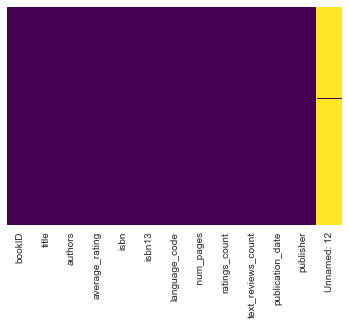

In [10]:
sns.heatmap(books.isnull(),yticklabels=False, cbar=False, cmap="viridis")
#Null values?

In [11]:
booksen.drop("Unnamed: 12",axis=1,inplace=True)

<AxesSubplot:>

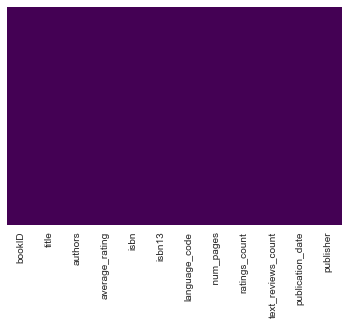

In [12]:
sns.heatmap(books.isnull(),yticklabels=False, cbar=False, cmap="viridis")
#Null values?

# 2. Ok, Let's filter our data for english

In [13]:
most_readlang = books.language_code.value_counts().to_frame().reset_index()
most_readlang.rename(columns={'language_code':'Count','index':'language_code'},inplace=True)
#most_readlang = most_readlang.iloc[:10,:]
most_readlang.sort_values(by='Count',ascending=False)

,language_code,Count
0,eng,8908
1,en-US,1408
2,spa,218
3,en-GB,214
4,fre,144
5,ger,99
6,jpn,46
7,mul,19
8,zho,14
9,grc,11


In [14]:
booksen = books[(books.language_code == 'eng') | (books.language_code == 'en-US') | (books.language_code == 'en-GB') | (books.language_code == 'en-CA')]

In [15]:
booksen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10537 entries, 0 to 11125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              10537 non-null  int64 
 1   title               10537 non-null  object
 2   authors             10537 non-null  object
 3   average_rating      10537 non-null  object
 4   isbn                10537 non-null  object
 5   isbn13              10537 non-null  object
 6   language_code       10537 non-null  object
 7     num_pages         10537 non-null  object
 8   ratings_count       10537 non-null  int64 
 9   text_reviews_count  10537 non-null  int64 
 10  publication_date    10537 non-null  object
 11  publisher           10537 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


# 3 Data Cleaning

Ok, so now we have all the English books, time to filter it for our task.

In [16]:
#Fix column name
booksen.rename(columns={'  num_pages': 'num_pages'},inplace=True)
booksen["average_rating"] = booksen.average_rating.astype(float)
booksen["num_pages"] = booksen.num_pages.astype(int)

In [17]:
booksen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10537 entries, 0 to 11125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10537 non-null  int64  
 1   title               10537 non-null  object 
 2   authors             10537 non-null  object 
 3   average_rating      10537 non-null  float64
 4   isbn                10537 non-null  object 
 5   isbn13              10537 non-null  object 
 6   language_code       10537 non-null  object 
 7   num_pages           10537 non-null  int32  
 8   ratings_count       10537 non-null  int64  
 9   text_reviews_count  10537 non-null  int64  
 10  publication_date    10537 non-null  object 
 11  publisher           10537 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 1.0+ MB


## We don't need these columns so drop them now.

In [18]:
booksen.drop("publisher",axis=1,inplace=True)
booksen.drop("language_code",axis=1,inplace=True)
booksen.drop("isbn",axis=1,inplace=True)
booksen.drop("isbn13",axis=1,inplace=True)

In [19]:
booksen.drop("bookID",axis=1,inplace=True)

In [20]:
booksen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10537 entries, 0 to 11125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10537 non-null  object 
 1   authors             10537 non-null  object 
 2   average_rating      10537 non-null  float64
 3   num_pages           10537 non-null  int32  
 4   ratings_count       10537 non-null  int64  
 5   text_reviews_count  10537 non-null  int64  
 6   publication_date    10537 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 617.4+ KB


# Now let's inspect the data, and then remove some of the bad data

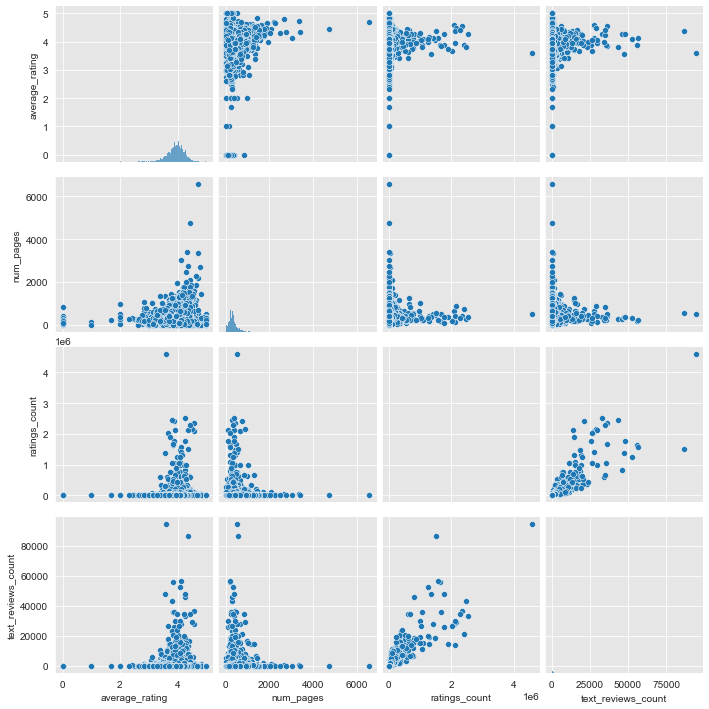

In [21]:
sns.pairplot(booksen)

<AxesSubplot:>

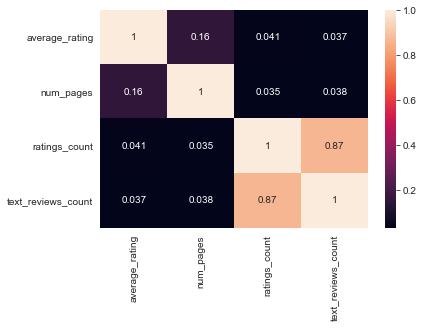

In [22]:
sns.heatmap(booksen.corr(), annot=True)

## Ok, time to clean bad data!

In [23]:
#Remove notabooks
booksen = booksen[booksen['authors']!='NOT A BOOK']
print('\nBooks with authors name as `NOT A BOOK`:',len(booksen[booksen['authors']=='NOT A BOOK']))


Books with authors name as `NOT A BOOK`: 0


In [24]:
#Removing books with less than 30 pages
booksen = booksen[booksen['num_pages'] > 30]
print('\nBooks with less than 30 = 0:',len(booksen[booksen['num_pages'] < 30]))



Books with less than 30 = 0: 0


In [25]:
#Removing unread books
booksen = booksen[booksen['average_rating'] != 0]
print('\nBooks with 0 ratings = 0:',len(booksen[booksen['average_rating'] == 0]))



Books with 0 ratings = 0: 0


In [26]:
#Removing unreviewed books
print('\nBooks with 0 reviews = 0:',len(booksen[booksen['text_reviews_count'] == 0]))
booksen = booksen[booksen['text_reviews_count'] != 0]


Books with 0 reviews = 0: 416


In [27]:
booksen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798 entries, 0 to 11125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               9798 non-null   object 
 1   authors             9798 non-null   object 
 2   average_rating      9798 non-null   float64
 3   num_pages           9798 non-null   int32  
 4   ratings_count       9798 non-null   int64  
 5   text_reviews_count  9798 non-null   int64  
 6   publication_date    9798 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 574.1+ KB


In [28]:
#From first analysis
removed = 10532-9798 
print ('Books removed =', removed)

Books removed = 734


## 4. Renovating Data

In [29]:
booksen.head(5)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr??,4.5700,652,2095690,27591,9/16/2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr??,4.4900,870,2153167,29221,09/01/2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.4200,352,6333,244,11/01/2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr??,4.5600,435,2339585,36325,05/01/2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr??,4.7800,2690,41428,164,9/13/2004


In [30]:
booksen.dtypes

title                  object
authors                object
average_rating        float64
num_pages               int32
ratings_count           int64
text_reviews_count      int64
publication_date       object
dtype: object

Adding a cool category System

In [31]:
def create_cat(i):
    if i >= 0 and i <=1:
        return '0-1'
    if i >= 1 and i <=2:
        return '1-2'
    if i >= 2 and i <=3:
        return '2-3'
    if i >= 3 and i <=4:
        return '3-4'
    if i >= 4 and i <=5:
        return '4-5'

In [32]:
booksen['avg_ratings'] = booksen['average_rating'].apply(create_cat)
booksen.head(3)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,avg_ratings
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr??,4.5700,652,2095690,27591,9/16/2006,4-5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr??,4.4900,870,2153167,29221,09/01/2004,4-5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.4200,352,6333,244,11/01/2003,4-5


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

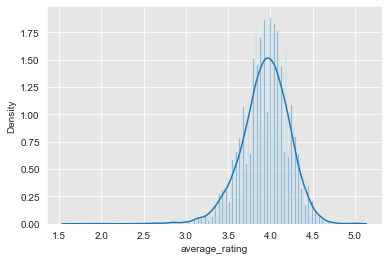

In [33]:
sns.distplot(booksen["average_rating"], kde = True, bins=200)
#what are these 0 books

<AxesSubplot:>

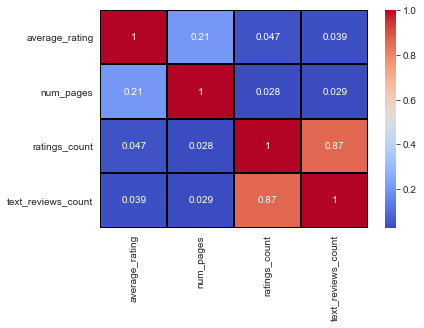

In [34]:
sns.heatmap(booksen.corr(), annot=True, cmap='coolwarm' , linecolor='black', linewidth='1')

In [35]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues


calculate_pvalues(booksen) 

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,0.0000,0.0000,0.0000,0.0001
num_pages,0.0000,0.0000,0.0051,0.0041
ratings_count,0.0000,0.0051,0.0000,0.0000
text_reviews_count,0.0001,0.0041,0.0000,0.0000


### So it looks like all columns correlate with each other?

In [36]:
calculate_pvalues(booksen) 

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,0.0000,0.0000,0.0000,0.0001
num_pages,0.0000,0.0000,0.0051,0.0041
ratings_count,0.0000,0.0051,0.0000,0.0000
text_reviews_count,0.0001,0.0041,0.0000,0.0000


In [37]:
booksen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798 entries, 0 to 11125
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               9798 non-null   object 
 1   authors             9798 non-null   object 
 2   average_rating      9798 non-null   float64
 3   num_pages           9798 non-null   int32  
 4   ratings_count       9798 non-null   int64  
 5   text_reviews_count  9798 non-null   int64  
 6   publication_date    9798 non-null   object 
 7   avg_ratings         9798 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 650.6+ KB


In [38]:
i = booksen[(booksen.average_rating == 'Rawles')].index
j = booksen[(booksen.average_rating == 'one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)')].index
k = booksen[(booksen.average_rating == 'Jr./Sam B. Warner')].index

In [39]:
booksen.drop(i)
booksen.drop(j)
booksen.drop(k)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,avg_ratings
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr??,4.5700,652,2095690,27591,9/16/2006,4-5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr??,4.4900,870,2153167,29221,09/01/2004,4-5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.4200,352,6333,244,11/01/2003,4-5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr??,4.5600,435,2339585,36325,05/01/2004,4-5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr??,4.7800,2690,41428,164,9/13/2004,4-5
...,...,...,...,...,...,...,...,...
11121,Whores for Gloria,William T. Vollmann,3.6900,160,932,111,02/01/1994,3-4
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.0600,512,156,20,12/21/2004,4-5
11123,You Bright and Risen Angels,William T. Vollmann,4.0800,635,783,56,12/01/1988,4-5
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.9600,415,820,95,08/01/1993,3-4




average_rating


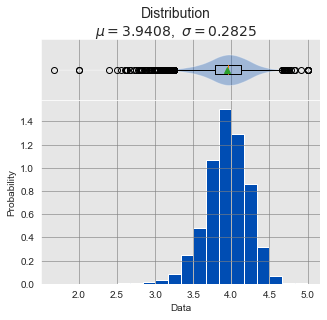



Statistics
----------

n         =  9798
Mean      =  3.9408
Std Dev   =  0.2825
Std Error =  0.0029
Skewness  = -0.5699
Kurtosis  =  1.7860
Maximum   =  5.0000
75%       =  4.1300
50%       =  3.9600
25%       =  3.7800
Minimum   =  1.6700
IQR       =  0.3500
Range     =  3.3300


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9822
p value =  0.0000

HA: Data is not normally distributed



num_pages


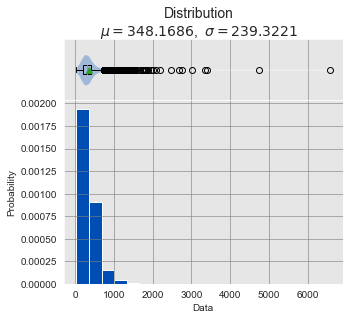



Statistics
----------

n         =  9798
Mean      =  348.1686
Std Dev   =  239.3221
Std Error =  2.4178
Skewness  =  4.7453
Kurtosis  =  71.6084
Maximum   =  6576.0000
75%       =  418.0000
50%       =  304.0000
25%       =  208.0000
Minimum   =  31.0000
IQR       =  210.0000
Range     =  6545.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7575
p value =  0.0000

HA: Data is not normally distributed



ratings_count


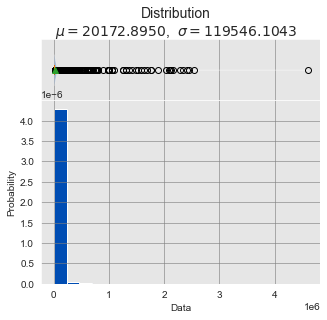



Statistics
----------

n         =  9798
Mean      =  20172.8950
Std Dev   =  119546.1043
Std Error =  1207.7213
Skewness  =  16.6741
Kurtosis  =  391.9148
Maximum   =  4597666.0000
75%       =  6269.5000
50%       =  1097.0000
25%       =  198.0000
Minimum   =  1.0000
IQR       =  6071.5000
Range     =  4597665.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.1352
p value =  0.0000

HA: Data is not normally distributed



text_reviews_count


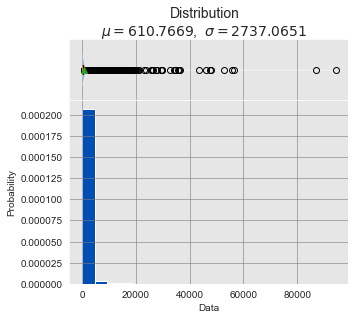



Statistics
----------

n         =  9798
Mean      =  610.7669
Std Dev   =  2737.0651
Std Error =  27.6514
Skewness  =  15.2401
Kurtosis  =  351.4737
Maximum   =  94265.0000
75%       =  294.0000
50%       =  64.0000
25%       =  15.0000
Minimum   =  1.0000
IQR       =  279.0000
Range     =  94264.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.1902
p value =  0.0000

HA: Data is not normally distributed



In [40]:
print('\n\naverage_rating')
analyze(booksen['average_rating'])
print('\n\nnum_pages')
analyze(booksen['num_pages'])
print('\n\nratings_count')
analyze(booksen['ratings_count'])
print('\n\ntext_reviews_count')
analyze(booksen['text_reviews_count'])

# 5.1  Analysis: General Trends

In [91]:
booksen.head(2)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,avg_ratings
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr??,4.5700,652,2095690,27591,9/16/2006,4-5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr??,4.4900,870,2153167,29221,09/01/2004,4-5


## Average Rating?

In [92]:
booksen["average_rating"].mean()

3.940767503572132

## Most published author?

In [42]:
most_popauth = booksen.authors.value_counts().to_frame().reset_index()
most_popauth.rename(columns={'authors':'Count','index':'authors'},inplace=True)
most_popauth = most_popauth.iloc[:10,:]
most_popauth.sort_values(by='Count',ascending=False)

,authors,Count
0,P.G. Wodehouse,38
1,Stephen King,36
2,Orson Scott Card,33
3,Agatha Christie,32
4,Piers Anthony,29
5,Mercedes Lackey,29
6,Sandra Brown,28
7,Dick Francis,27
8,Rumiko Takahashi,23
9,James Patterson,23


In [43]:
booksen["authors"].value_counts()

P.G. Wodehouse                              38
Stephen King                                36
Orson Scott Card                            33
Agatha Christie                             32
Piers Anthony                               29
                                            ..
Jimmy Buffett                                1
Daniel Topolski/Patrick Robinson             1
Garry Nelson                                 1
George Selden/Garth Williams                 1
Plotinus/Stephen MacKenna/John M. Dillon     1
Name: authors, Length: 5853, dtype: int64

Clearly many values are missing, so this analysis makes no sense. Chomsky wrote more than 1 book, Mailer wrote more than 30 and he's nowhere.

## Most common rating for a book?

In [44]:
### 3-4* most common avg rating for a book

avg_rate = booksen.avg_ratings.value_counts().to_frame().reset_index()
avg_rate.rename(columns={'avg_ratings':'Count','index':'avg_ratings'},inplace=True)
#avg_rate = avg_rate.iloc[:10,:]
avg_rate['%'] = (avg_rate['Count'] / avg_rate['Count'].sum()) * 100
avg_rate.sort_values(by='Count',ascending=False)

,avg_ratings,Count,%
0,3-4,5590,57.0525
1,4-5,4162,42.4781
2,2-3,43,0.4389
3,1-2,3,0.0306


In [45]:
booksen["average_rating"].mean()

3.940767503572132

## Most common book length (pages)

In [77]:
avg_pages = booksen.num_pages.value_counts().to_frame().reset_index()
avg_pages.rename(columns={'num_pages':'Count','index':'num_pages'},inplace=True)
avg_pages = avg_pages.iloc[:10,:]
avg_pages.sort_values(by='Count',ascending=False)

,num_pages,Count
0,288,218
1,320,208
2,256,198
3,352,194
4,192,188
5,224,186
6,208,167
7,304,165
8,384,163
9,240,161


## Lowest rated book

In [47]:
booksen["average_rating"].sort_values(ascending=True)

8001   1.6700
5672   2.0000
8112   2.0000
8815   2.4000
6505   2.5000
        ...  
4790   5.0000
6250   5.0000
9286   5.0000
855    5.0000
8547   5.0000
Name: average_rating, Length: 9798, dtype: float64

In [48]:
##What is the lowest rated book, with many reviews on it?

result = booksen.loc[8815]
result

title                                 Citizen Girl
authors               Emma McLaughlin/Nicola Kraus
average_rating                              2.4000
num_pages                                      305
ratings_count                                 5415
text_reviews_count                             577
publication_date                        10/04/2005
avg_ratings                                    2-3
Name: 8815, dtype: object

In [51]:
low_rate = booksen["average_rating"].sort_values(ascending=True).to_frame()
low_rate.rename(columns={'average_ratings':'Count','index':'Book ID'},inplace=True)

low_rate['ratings_count'] = booksen["ratings_count"]
low_rate

,average_rating,ratings_count
8001,1.6700,3
5672,2.0000,1
8112,2.0000,1
8815,2.4000,5415
6505,2.5000,4
...,...,...
4790,5.0000,5
6250,5.0000,2
9286,5.0000,1
855,5.0000,4


In [82]:
high_rate = booksen["average_rating"].sort_values(ascending=False).to_frame()
high_rate.rename(columns={'average_ratings':'Count','index':'Book ID'},inplace=True)

high_rate['ratings_count'] = booksen["ratings_count"]
high_rate.head(15)

,average_rating,ratings_count
8547,5.0000,1
9286,5.0000,1
855,5.0000,4
6250,5.0000,2
4790,5.0000,5
4374,4.9100,11
9816,4.8300,6
6590,4.8200,32213
4,4.7800,41428
6592,4.7600,23875


## Highest Rated Book

In [83]:
##What is the highest rated book, with many reviews on it?

result = booksen.loc[6590]
result

title                 The Complete Calvin and Hobbes
authors                               Bill Watterson
average_rating                                4.8200
num_pages                                       1456
ratings_count                                  32213
text_reviews_count                               930
publication_date                          09/06/2005
avg_ratings                                      4-5
Name: 6590, dtype: object

In [75]:
short_book = booksen["num_pages"].sort_values(ascending=False).to_frame()
short_book.rename(columns={'num_pages':'Page Count','index':'Book ID'},inplace=True)

short_book['Ratings Count'] = booksen["ratings_count"]
short_book["title"] = booksen["title"]
short_book.head(10)

,Page Count,Ratings Count,title
6500,6576,1338,The Complete Aubrey/Maturin Novels (5 Volumes)
6805,4736,1493,The Second World War
10910,3400,6,Remembrance of Things Past (Boxed Set)
6,3342,28242,Harry Potter Collection (Harry Potter #1-6)
6825,3020,2734,Summa Theologica 5 Vols
7865,2751,23,Harrison's Principles of Internal Medicine
4,2690,41428,Harry Potter Boxed Set Books 1-5 (Harry Potte...
10753,2480,4196,The Sword of Truth Boxed Set I: Wizard's Firs...
5616,2198,4166,Study Bible: NIV
1053,2088,98611,The Complete Anne of Green Gables Boxed Set (A...


## Most text reviews?

In [87]:
rv_book = booksen["text_reviews_count"].sort_values(ascending=False).to_frame()
rv_book.rename(columns={'num_pages':'Page Count','index':'Book ID'},inplace=True)

rv_book['Ratings Count'] = booksen["ratings_count"]
rv_book["title"] = booksen["title"]
rv_book.head(10)

,text_reviews_count,Ratings Count,title
10340,94265,4597666,Twilight (Twilight #1)
5272,86881,1516367,The Book Thief
1069,56604,1585589,The Giver (The Giver #1)
284,55843,1631221,The Alchemist
10704,52759,1260027,Water for Elephants
7312,47951,1766725,The Lightning Thief (Percy Jackson and the Oly...
5409,47620,1362264,Eat Pray Love
2060,46176,808656,The Glass Castle
1462,43499,2457092,The Catcher in the Rye
3,36325,2339585,Harry Potter and the Prisoner of Azkaban (Harr...


## Most ratings?

In [88]:
rat_book = booksen["ratings_count"].sort_values(ascending=False).to_frame()
rat_book.rename(columns={'num_pages':'Page Count','index':'Book ID'},inplace=True)

rat_book['Ratings Count'] = booksen["ratings_count"]
rat_book["title"] = booksen["title"]
rat_book.head(10)

,ratings_count,Ratings Count,title
10340,4597666,4597666,Twilight (Twilight #1)
1697,2530894,2530894,The Hobbit or There and Back Again
1462,2457092,2457092,The Catcher in the Rye
307,2418736,2418736,Angels & Demons (Robert Langdon #1)
3,2339585,2339585,Harry Potter and the Prisoner of Azkaban (Harr...
4416,2293963,2293963,Harry Potter and the Chamber of Secrets (Harry...
1,2153167,2153167,Harry Potter and the Order of the Phoenix (Har...
23,2128944,2128944,The Fellowship of the Ring (The Lord of the Ri...
2114,2111750,2111750,Animal Farm
0,2095690,2095690,Harry Potter and the Half-Blood Prince (Harry ...


## 5.2 Analysis: Relationships between GoodReads metrics?

<AxesSubplot:>

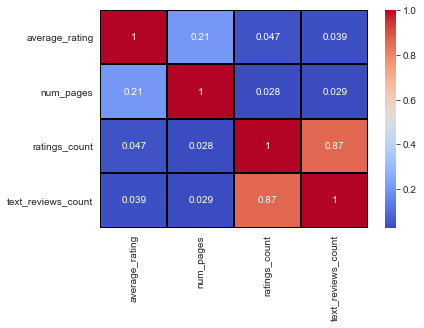

In [90]:
sns.heatmap(booksen.corr(), annot=True, cmap='coolwarm' , linecolor='black', linewidth='1')

In [93]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues


calculate_pvalues(booksen) 

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,0.0000,0.0000,0.0000,0.0001
num_pages,0.0000,0.0000,0.0051,0.0041
ratings_count,0.0000,0.0051,0.0000,0.0000
text_reviews_count,0.0001,0.0041,0.0000,0.0000


## 5.3 So if everything correlates, what are the trends?

In [110]:
bookcut = booksen.sort_values("num_pages", ascending=False)[5:]

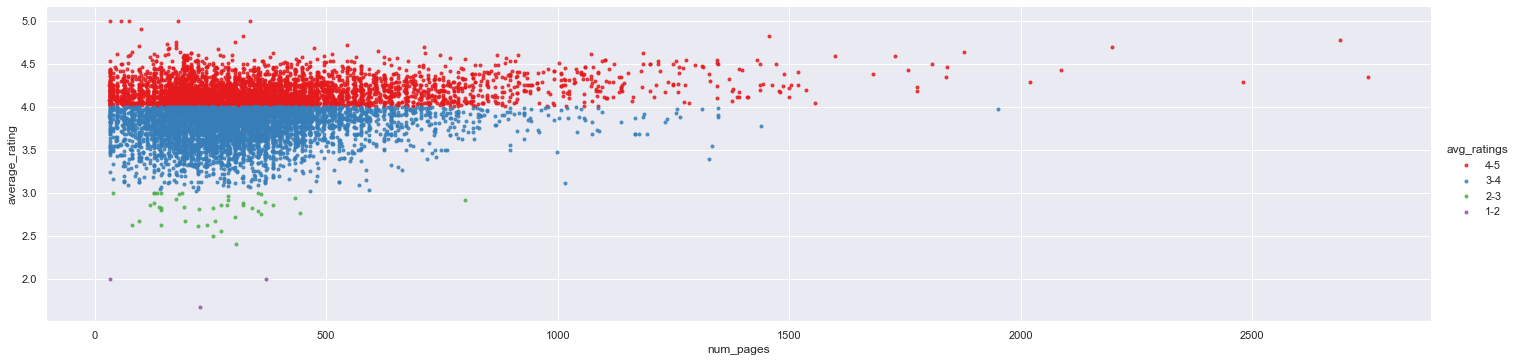

In [166]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})

sns.lmplot(x="num_pages", y="average_rating", data=bookcut, hue = "avg_ratings", palette="Set1",
           x_jitter=False, y_jitter=False,aspect=4, fit_reg=False, markers="."
          )

## 5.3.1. More pages, more likely to be higher average rating? - Bias for only reviewing what is read.

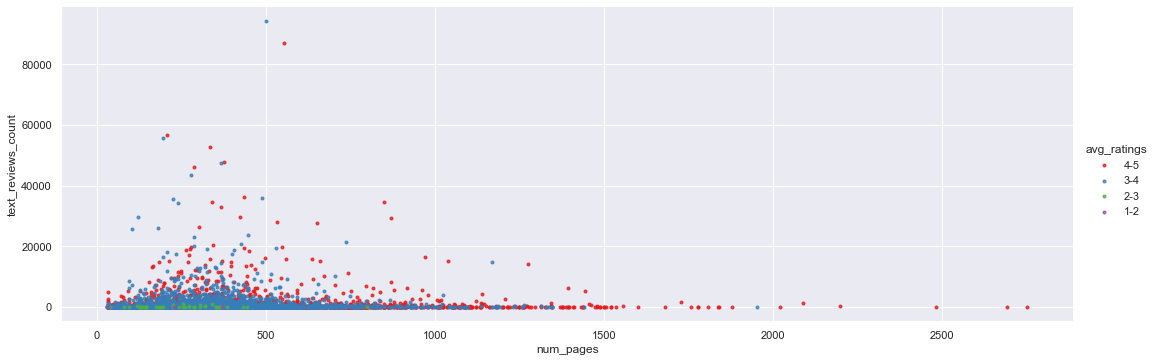

In [183]:
sns.lmplot(x="num_pages", y="text_reviews_count", data=bookcut, hue = "avg_ratings", palette="Set1",
           x_jitter=False, y_jitter=False,aspect=3, fit_reg=False, markers=".",
          )

## 5.3.2 More text reviews for shorter, less appealing books. As predicted, due to fewer readers of longer books.

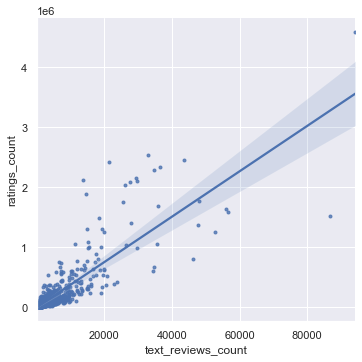

In [193]:
sns.lmplot(x="text_reviews_count", y="ratings_count", data=bookcut, palette="Set1",
           x_jitter=False, y_jitter=False,aspect=1, fit_reg=True, markers="."
          )


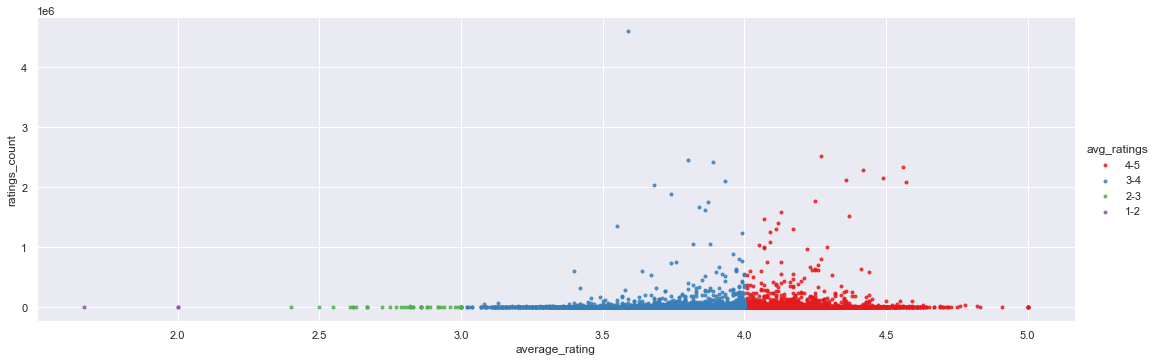

In [194]:
sns.lmplot(x="average_rating", y="ratings_count", data=bookcut, hue = "avg_ratings", palette="Set1",
           x_jitter=False, y_jitter=False,aspect=3, fit_reg=False, markers=".",
          )

## Books with an average rating just above the average average rating (3.9) have a greater likelihood of high rating count. 

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

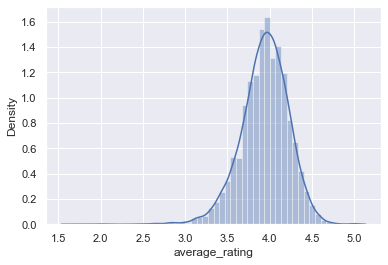

In [201]:
sns.distplot(booksen["average_rating"])

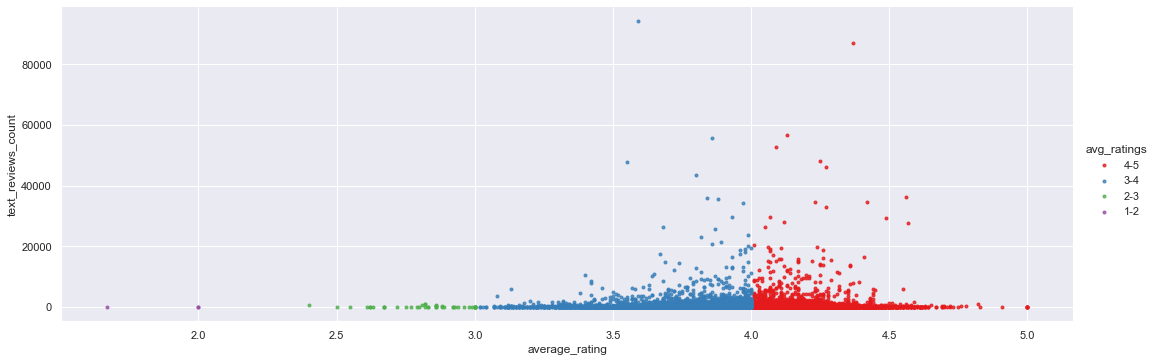

In [203]:
sns.lmplot(x="average_rating", y="text_reviews_count", data=bookcut, hue = "avg_ratings", palette="Set1",
           x_jitter=False, y_jitter=False,aspect=3, fit_reg=False, markers=".",
          )

## Books with an average rating just above the average average rating (3.9) have a greater likelihood of high review count.